# 30分钟学会 ggplot2

**特点**

+ 用户可以在更加抽象的层面上控制图形，使得绘图的创造性增加
+ 使用图层的设计方式，有利于结构化思维
+ 图形美观，同时避免繁琐细节

**基本概念**

+ 数据和映射 (Data and Mapping)

将数据中的变量映射到图形属性。映射控制了二者乊
间的关系
+ 标度 (Scale)

标度负责控制映射后图形属性的显示方式。具体形式
上来看是图例和坐标刻度。 Scale和Mapping是紧密相
关的概念
+ 几何对象 (Geometric)

几何对象代表我们在图中实际看到的图形元素，如点、
线、多边形等
+ 统计变换 (Statistics)

对原始数据进行某种计算，例如对二元散点图加上一
条回归线
+ 坐标系统 (Coordinate)

坐标系统控制坐标轴幵影响所有图形元素，坐标轴可
以进行变换以满足不同的需要
+ 图层 (Layer)

数据、映射、几何对象、统计变换等构成一个图层。
图层可以允许用户一步步的构建图形，方便单独对图
层进行修改。
+ 分面 (Facet)

条件绘图，将数据按某种方式分组，然后分别绘图。
分面就是控制分组绘图的方法和排列形式。

## 简单示例

Warning message:
"package 'ggplot2' was built under R version 3.4.4"

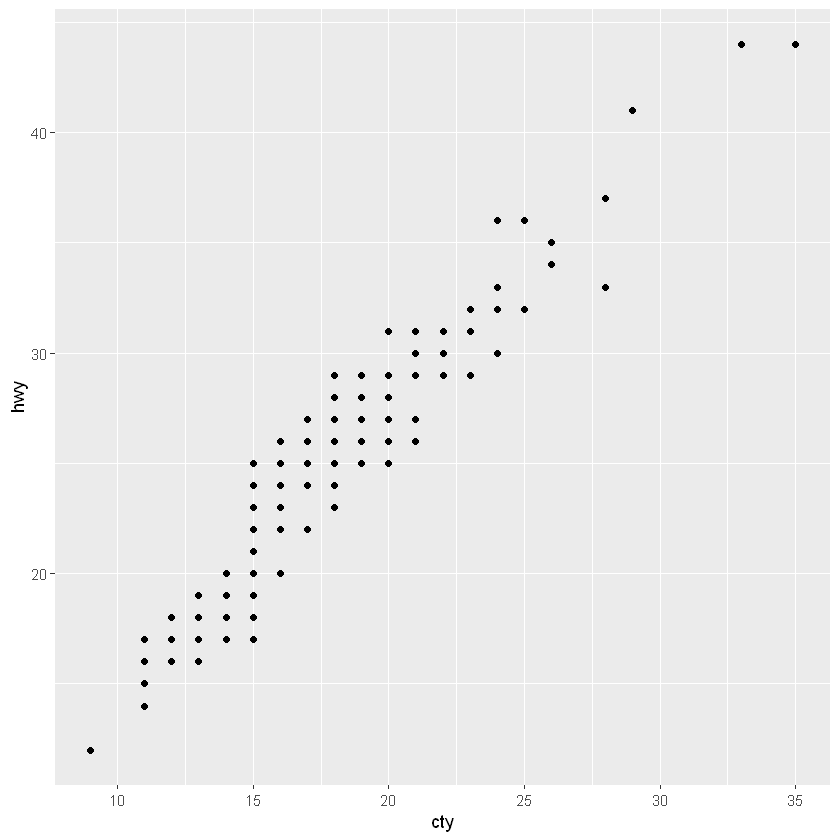

In [3]:
library(ggplot2)
p <- ggplot(data = mpg, mapping = aes(x=cty,y=hwy))
p+geom_point()

将年份映射到颜色属性

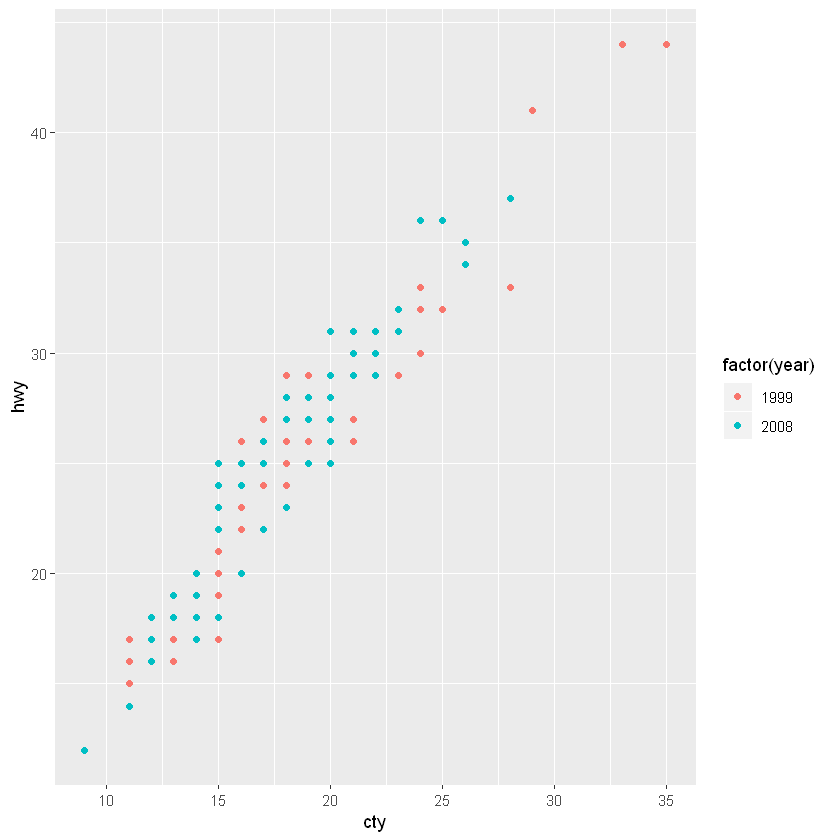

In [5]:
library(ggplot2)
p <- ggplot(data = mpg, mapping = aes(x=cty,y=hwy,colour=factor(year)))
p+geom_point()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


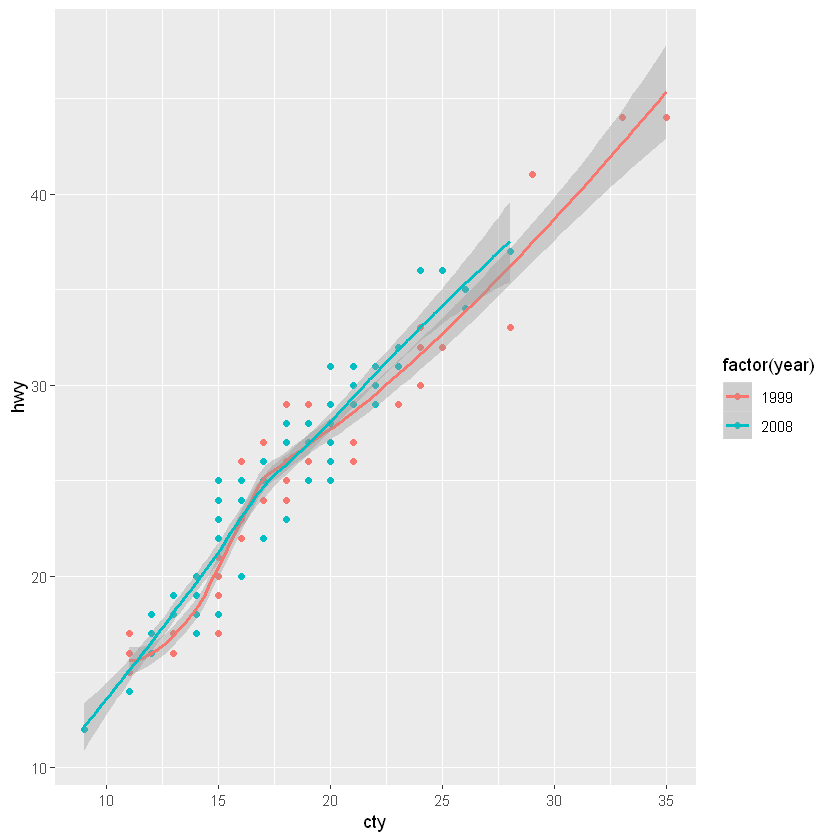

In [7]:
p + geom_point() + stat_smooth()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


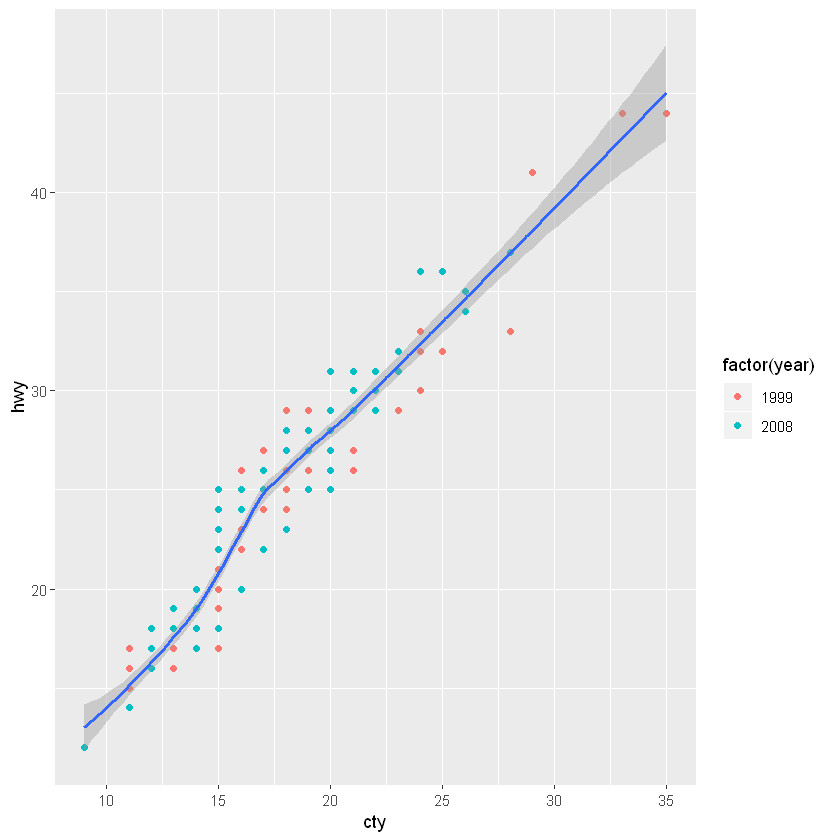

In [8]:
 p <- ggplot(mpg, aes(x=cty,y=hwy))
p + geom_point(aes(colour=factor(year)))+
stat_smooth()

用标度来改变颜色取值

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


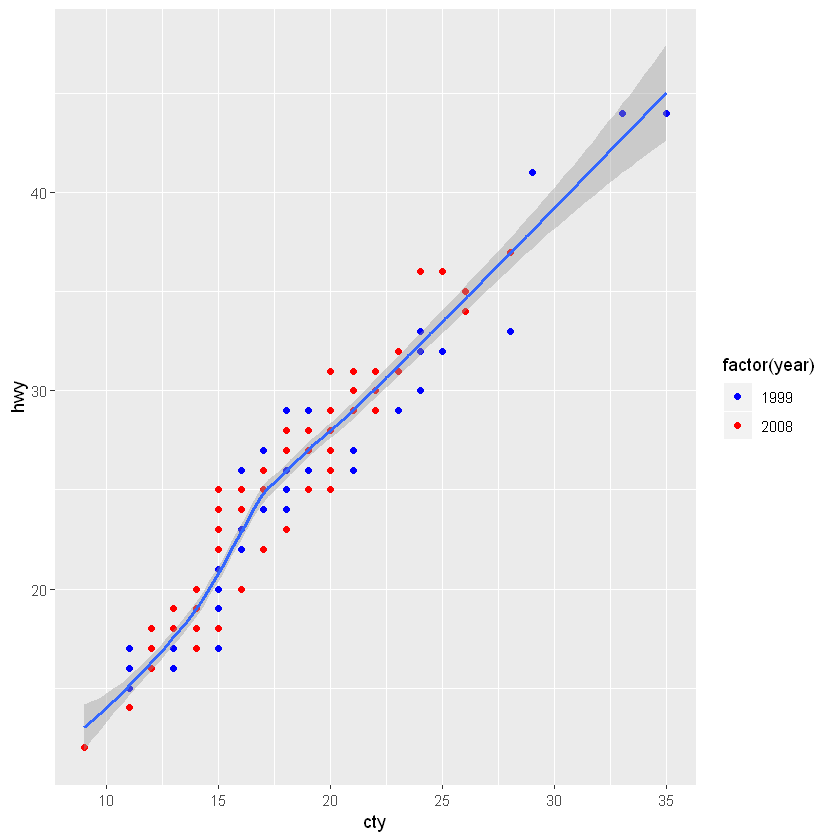

In [9]:
p + geom_point(aes(colour=factor(year)))+
stat_smooth()+
scale_color_manual(values =c('blue','red'))

映射散点大小

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


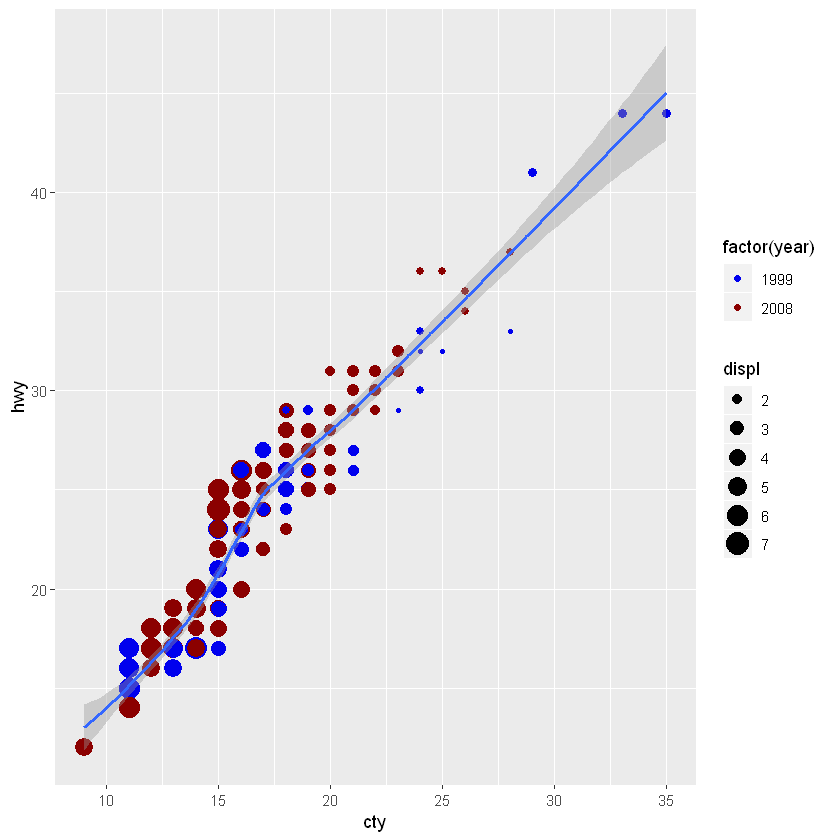

In [10]:
p + geom_point(aes(colour=factor(year),size=displ))+
stat_smooth()+
scale_color_manual(values =c('blue2','red4'))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


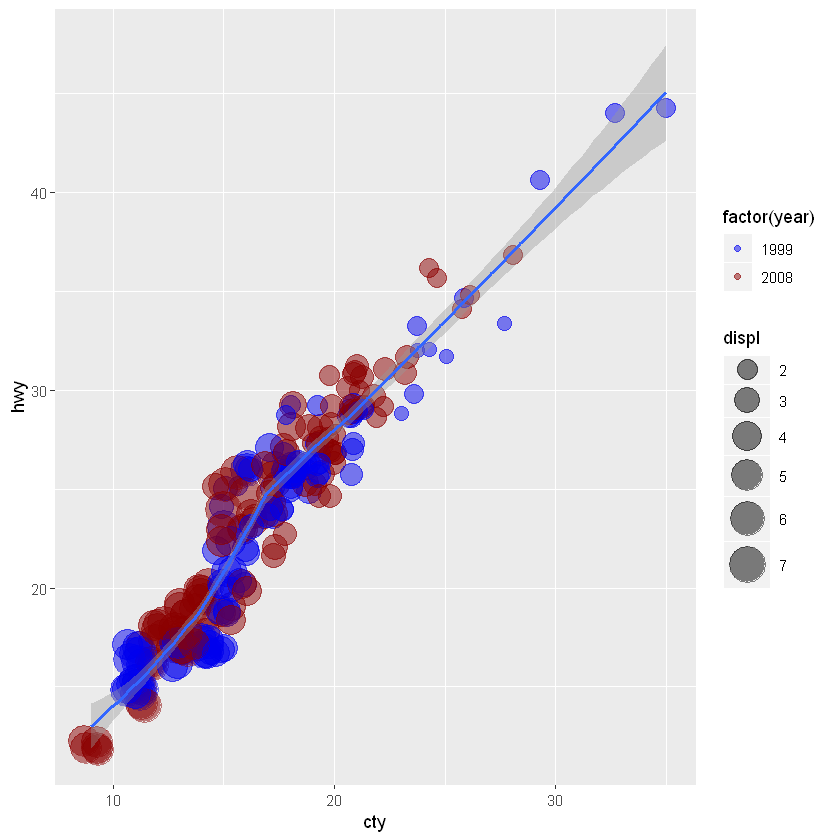

In [11]:
p + geom_point(aes(colour=factor(year),size=displ),
alpha=0.5,position = "jitter") + stat_smooth()+
scale_color_manual(values =c('blue2','red4'))+
scale_size_continuous(range = c(4, 10))

可以控制坐标

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


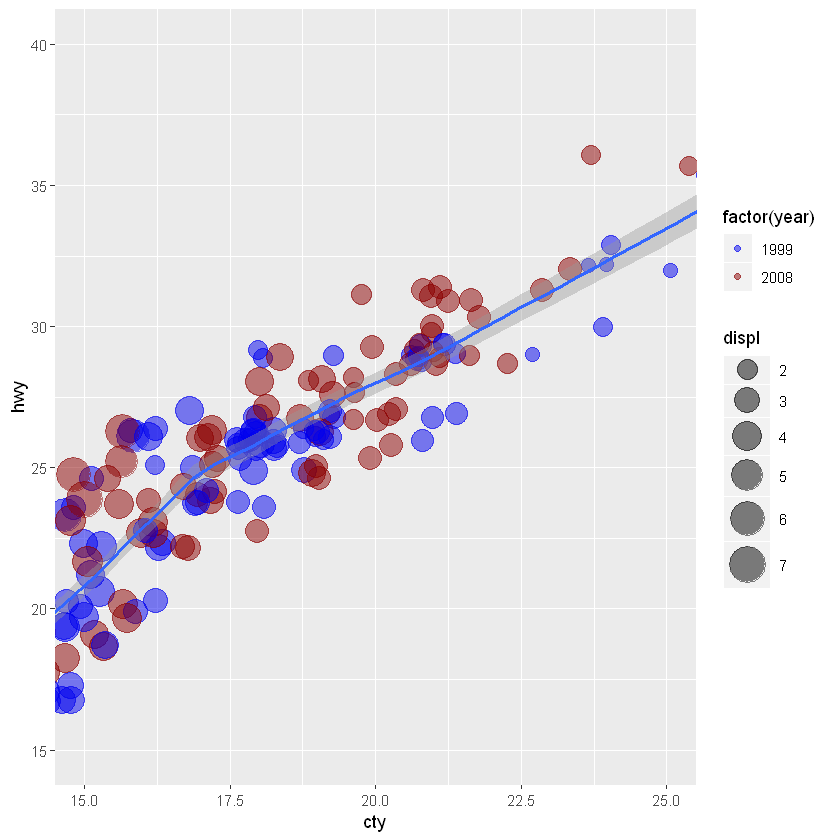

In [12]:
p + geom_point(aes(colour=factor(year),size=displ),
alpha=0.5,position = "jitter")+ stat_smooth()+
scale_color_manual(values =c('blue2','red4'))+
scale_size_continuous(range = c(4, 10))+
coord_cartesian(xlim = c(15, 25),ylim=c(15,40))

利用 facet 分别显示不同年份的数据

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


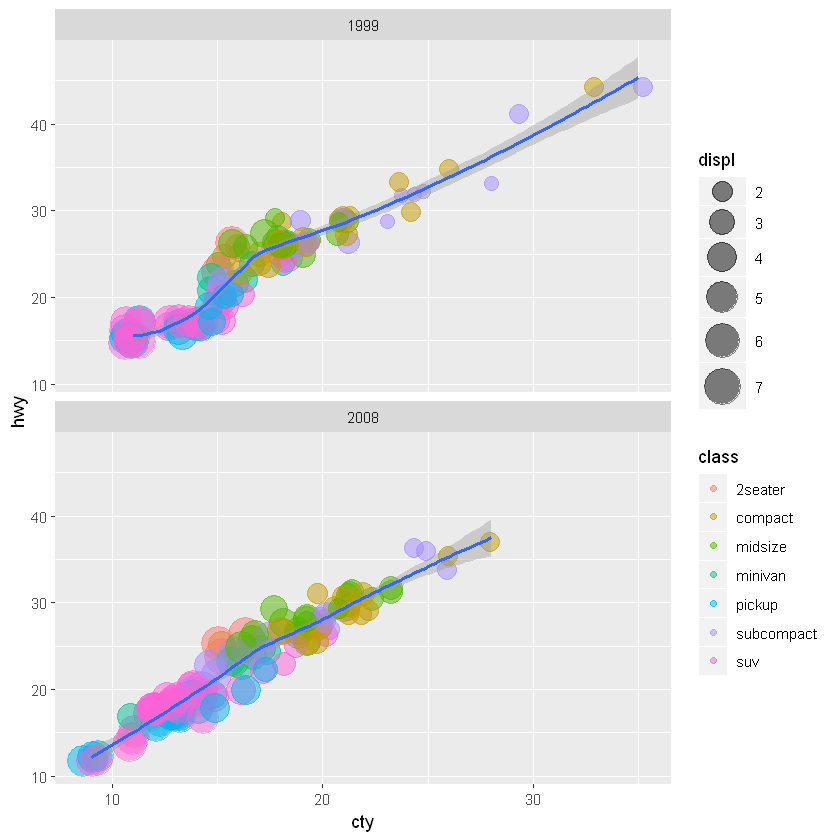

In [13]:
p + geom_point(aes(colour=class, size=displ),
alpha=0.5, position = "jitter")+ stat_smooth()+
scale_size_continuous(range = c(4, 10))+
facet_wrap(~ year, ncol=1)

In [14]:
p <- ggplot(mpg, aes(x=cty, y=hwy))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


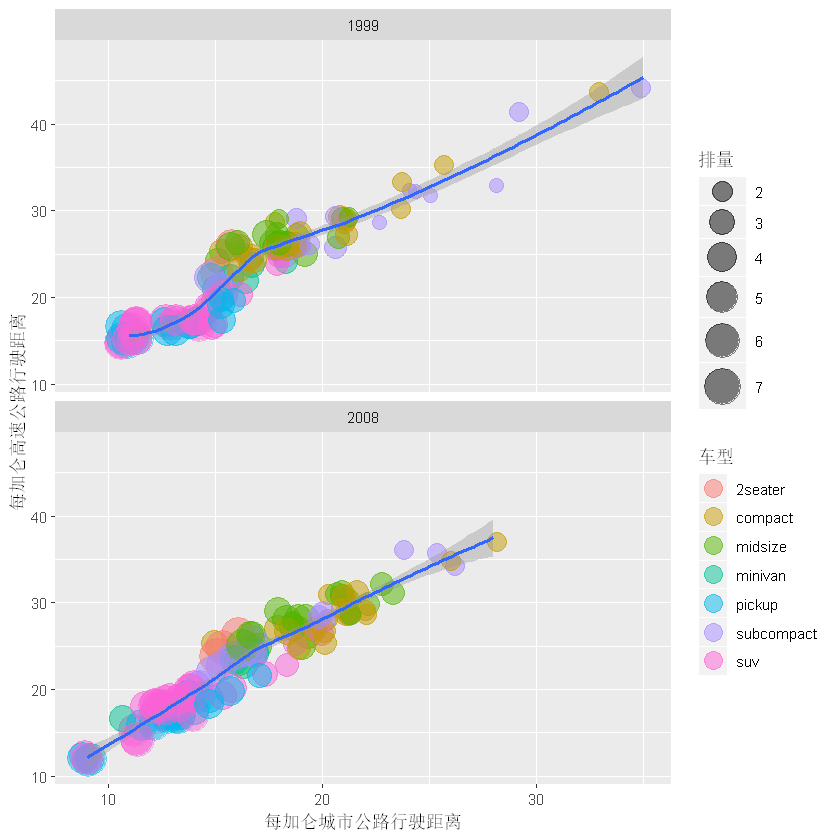

In [16]:
 p + geom_point(aes(colour=class,size=displ),
alpha=0.5,position = "jitter")+
stat_smooth()+
scale_size_continuous(range = c(4, 10))+
facet_wrap(~ year,ncol=1)+
#opts(title='汽车油耗与型号')+
labs(y='每加仑高速公路行驶距离',
x='每加仑城市公路行驶距离')+
guides(size=guide_legend(title='排量'),
colour = guide_legend(title='车型',
override.aes=list(size=5)))

直方图

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


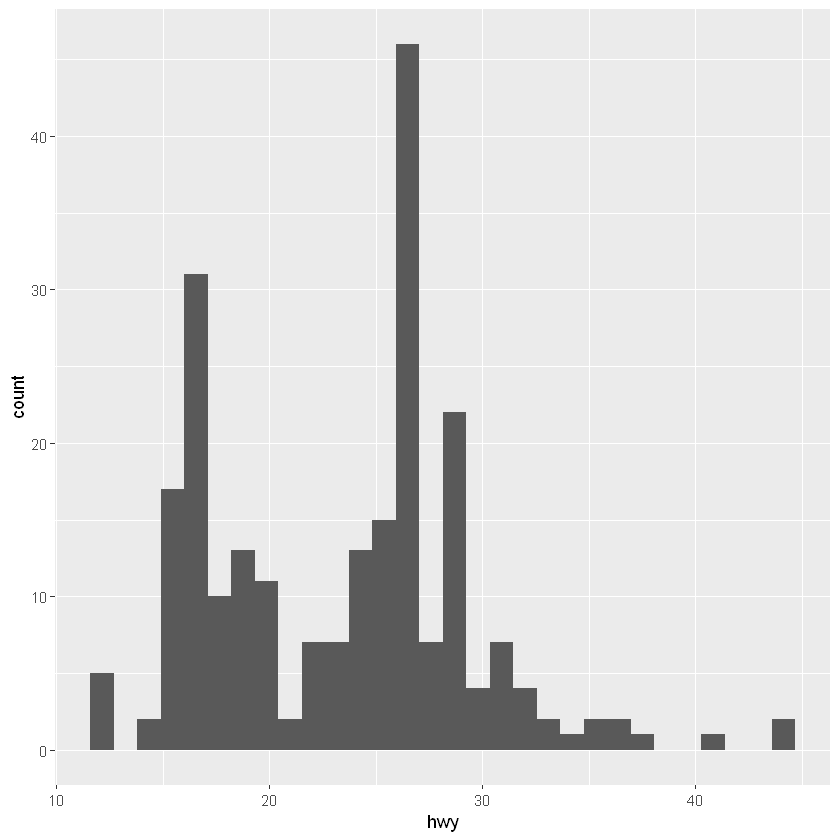

In [17]:
p <- ggplot(mpg,aes(x=hwy))
p + geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


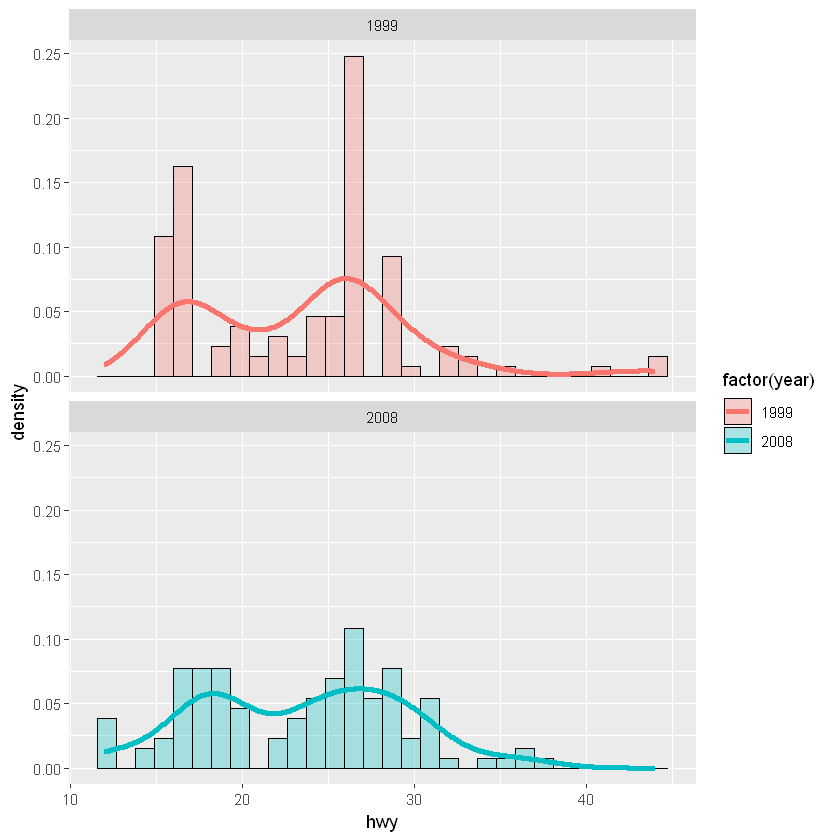

In [18]:
p + geom_histogram(aes(fill=factor(year),y=..density..), alpha=0.3,colour='black')+
stat_density(geom='line',position='identity',size=1.5, aes(colour=factor(year)))+
facet_wrap(~year,ncol=1)

条形图

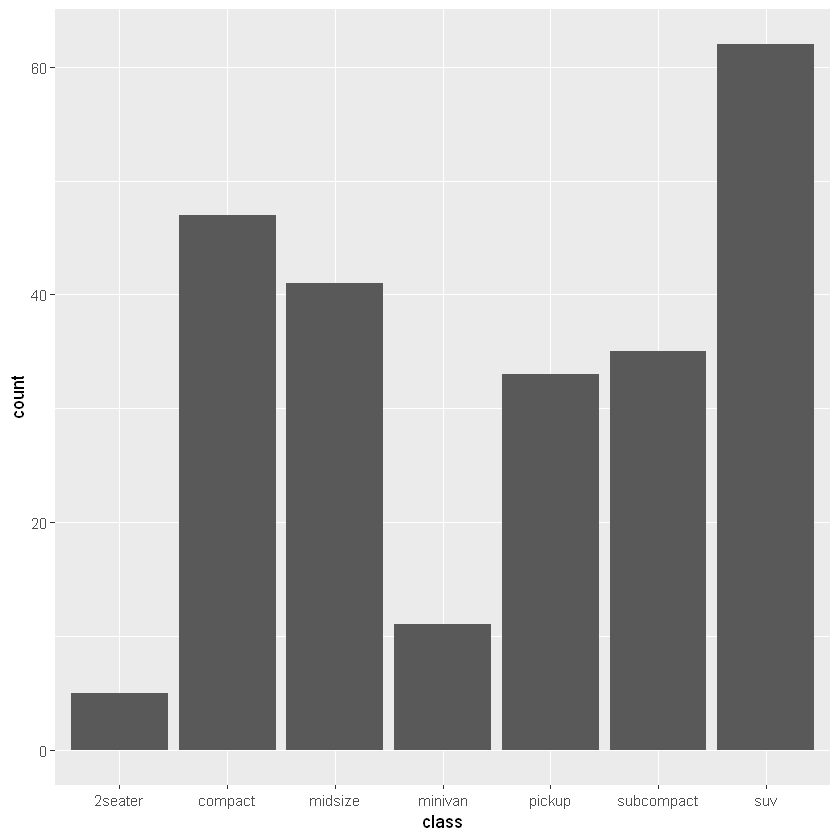

In [19]:
p <- ggplot(mpg,aes(x=class))
p+geom_bar()

根据计数排序后
绘制的条形图

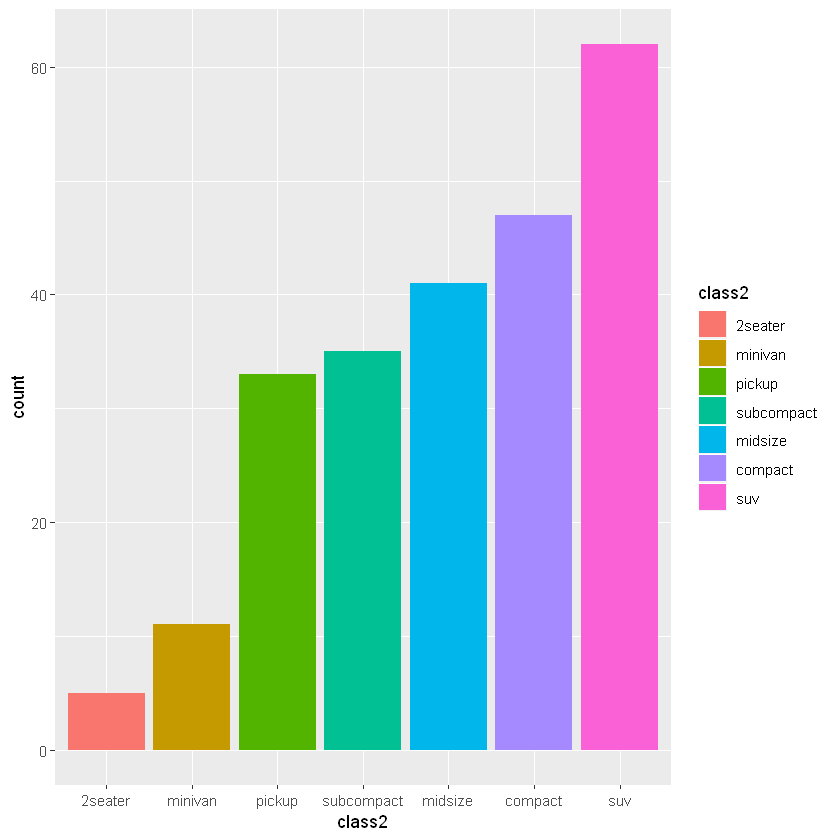

In [20]:
class2 <- mpg$class; class2 <- reorder(class2,class2,length)
mpg$class2 <- class2
p <- ggplot(mpg, aes(x=class2))
p + geom_bar(aes(fill=class2))

根据年份分别绘制条形图，position控制位置调整方式

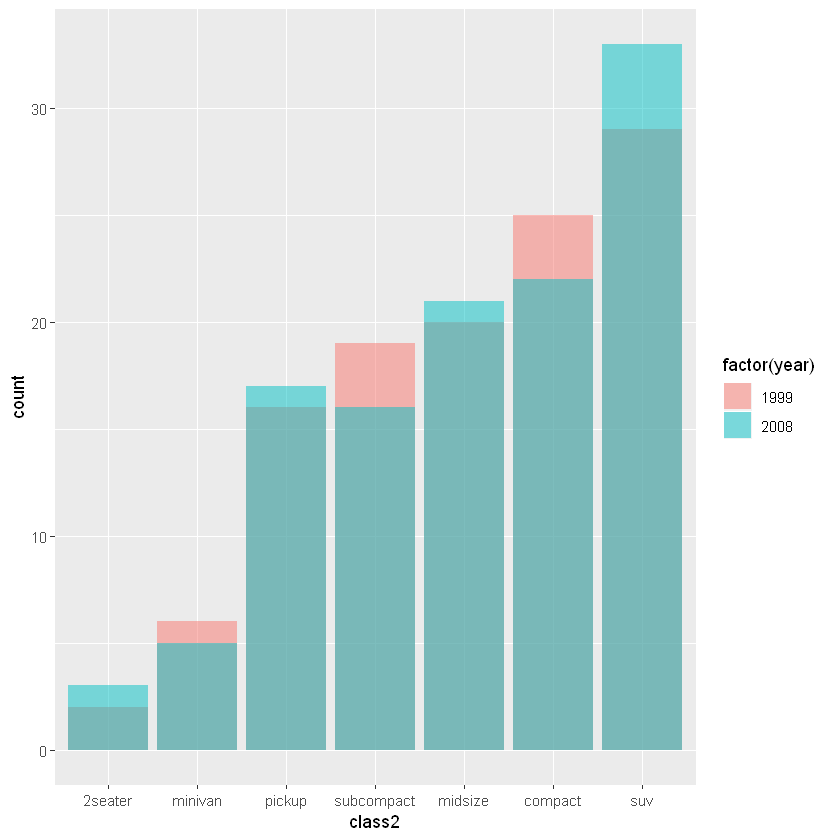

In [21]:
p <- ggplot(mpg, aes(class2,fill=factor(year)))
p + geom_bar(position='identity',alpha=0.5)

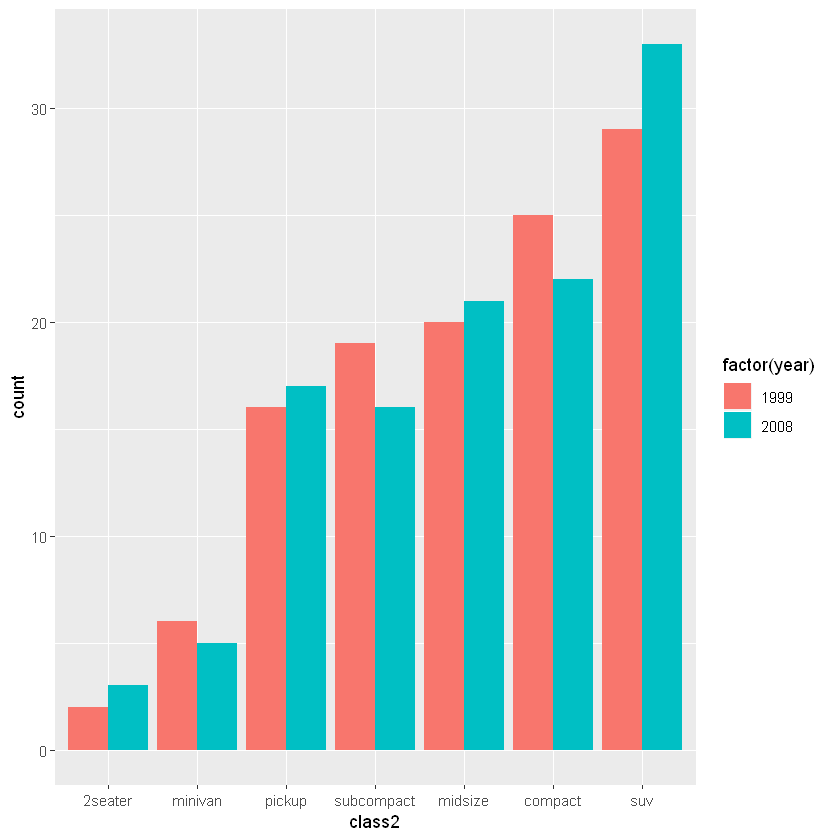

In [23]:
p + geom_bar(position='dodge')

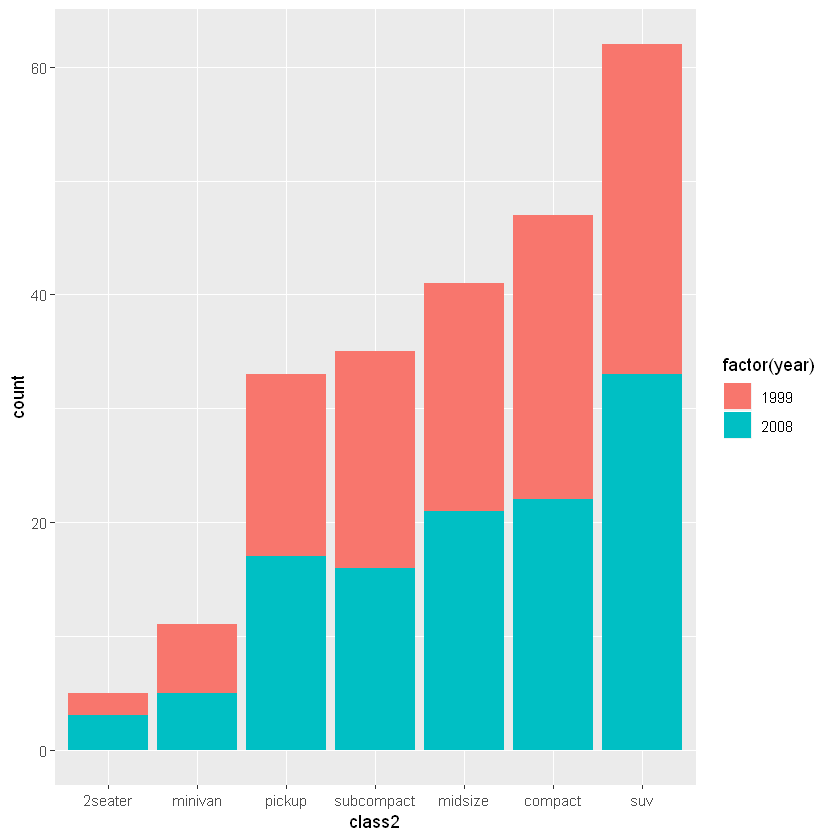

In [24]:
p+geom_bar(position='stack')

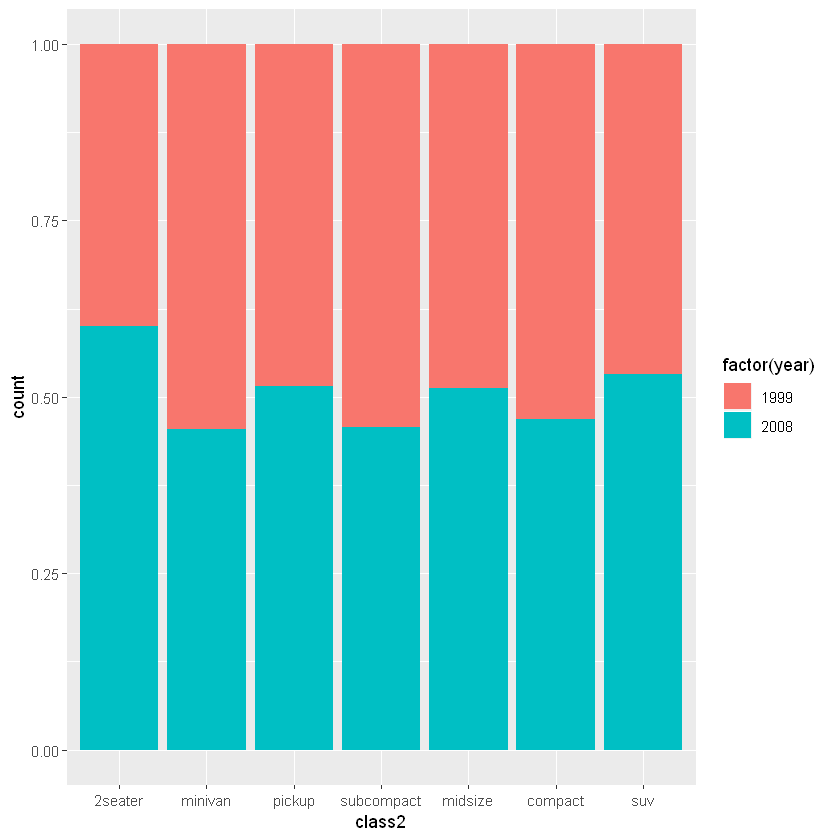

In [25]:
p+geom_bar(position='fill')

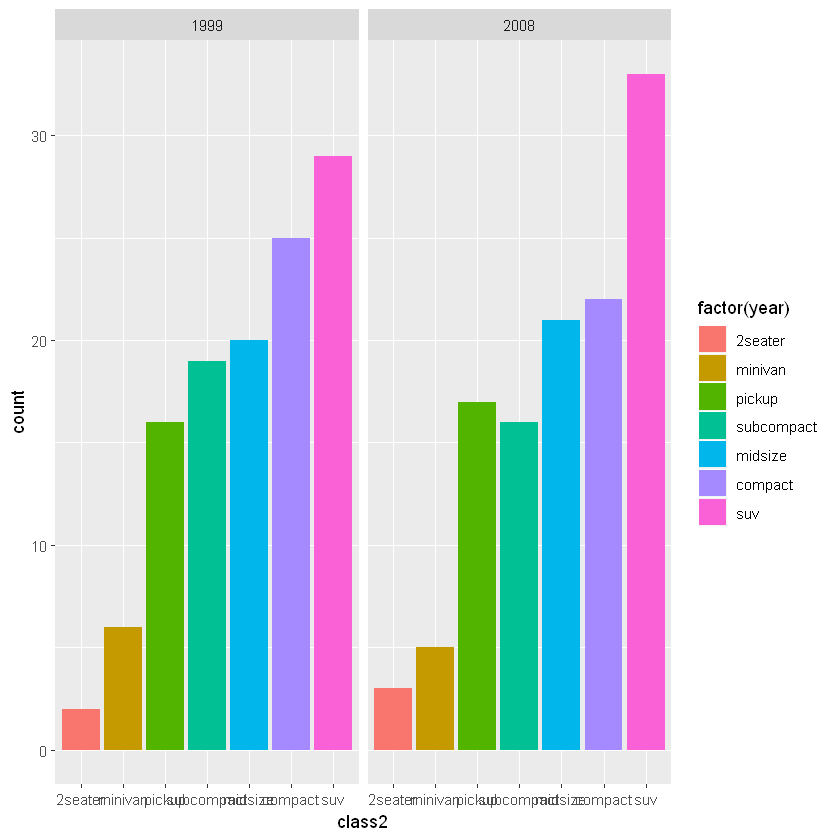

In [26]:
 p+ geom_bar(aes(fill=class2))+facet_wrap(~year)

饼图

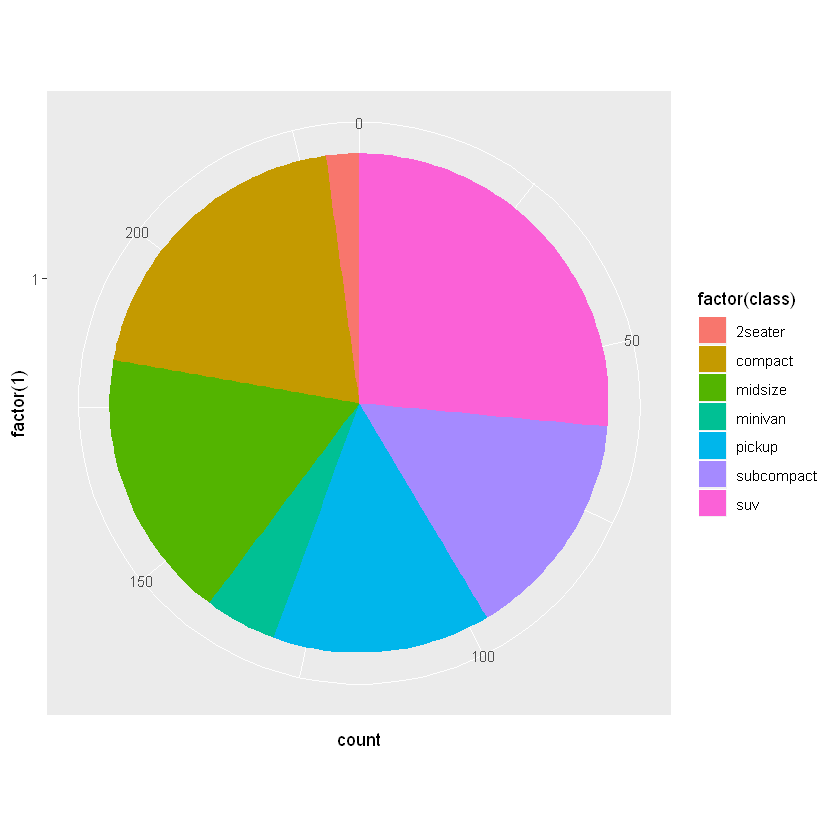

In [27]:
 p <- ggplot(mpg, aes(x = factor(1), fill = factor(class))) +
geom_bar(width = 1)
p + coord_polar(theta = "y")

箱线图

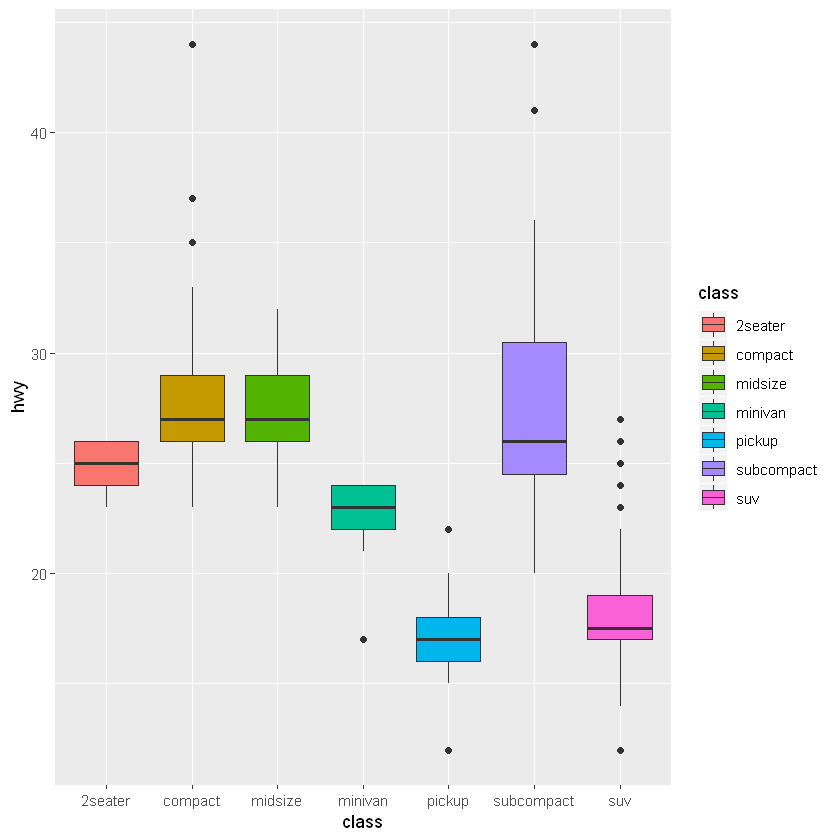

In [28]:
p <- ggplot(mpg, aes(class,hwy,fill=class))
p+geom_boxplot()

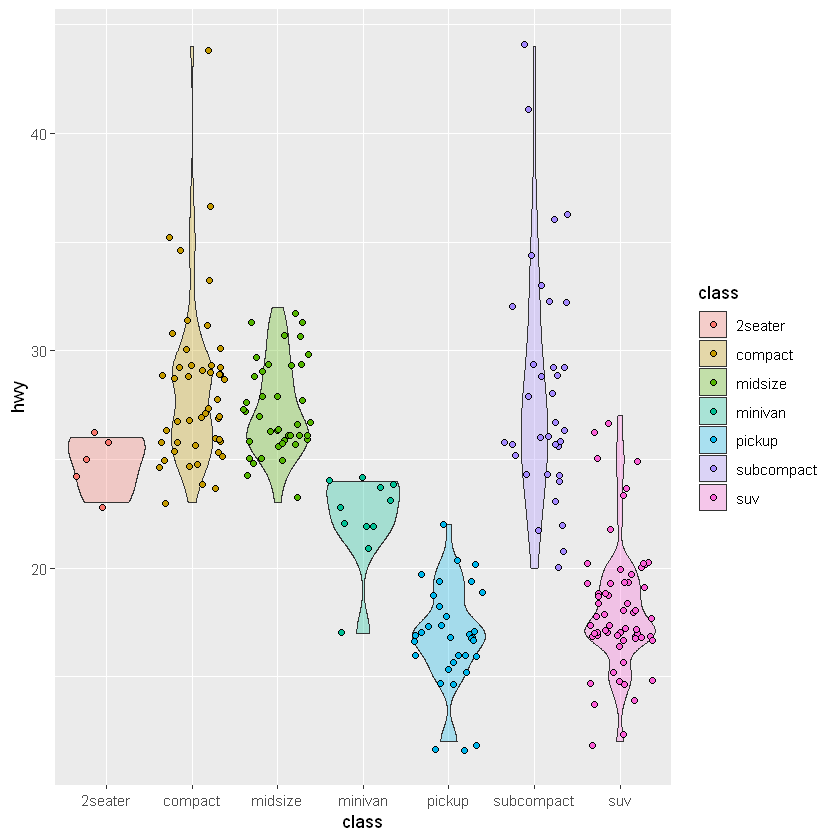

In [29]:
p+ geom_violin(alpha=0.3,width=0.9)+
geom_jitter(shape=21)

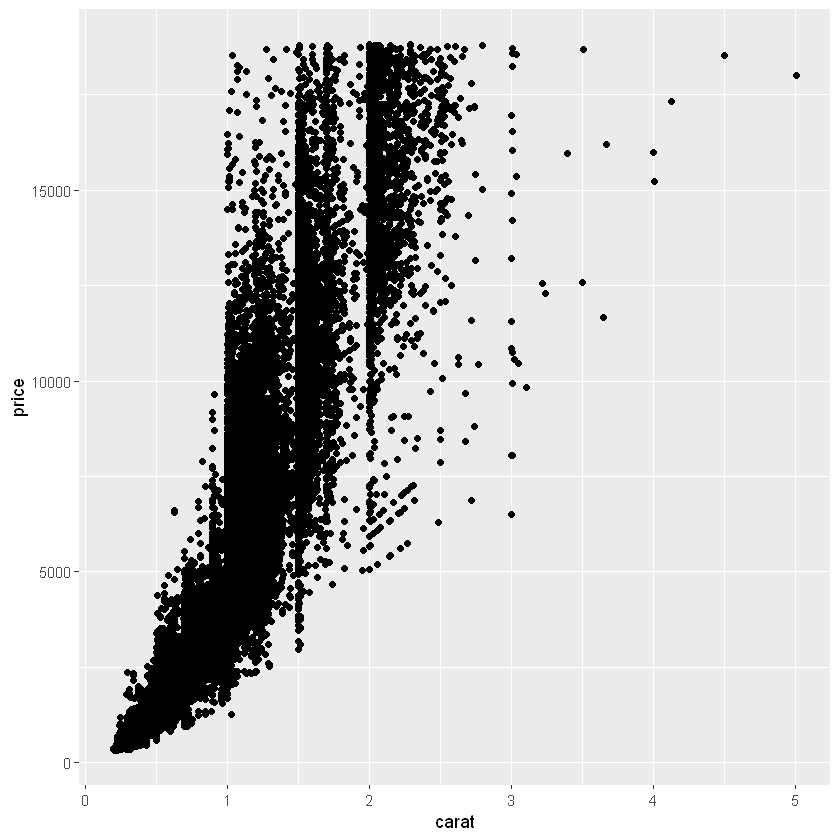

In [31]:
p <- ggplot(diamonds,aes(carat,price))
p + geom_point()

## 观察密集散点的方法
+ 增加扰动
+ 增加透明度
+ 二维直方图
+ 密度图

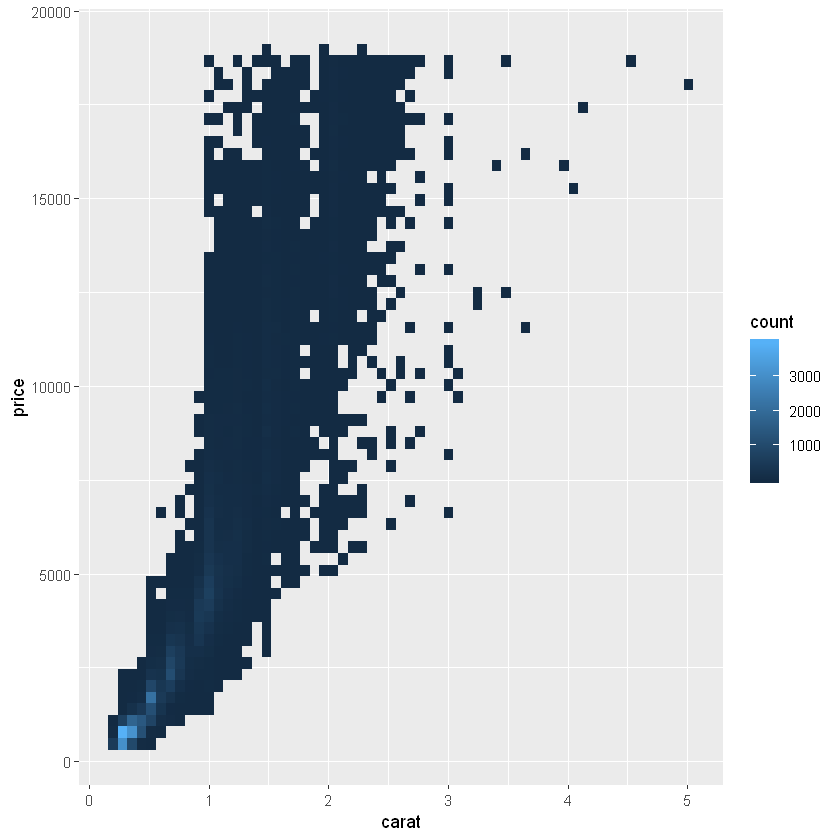

In [32]:
p + stat_bin2d(bins = 60)

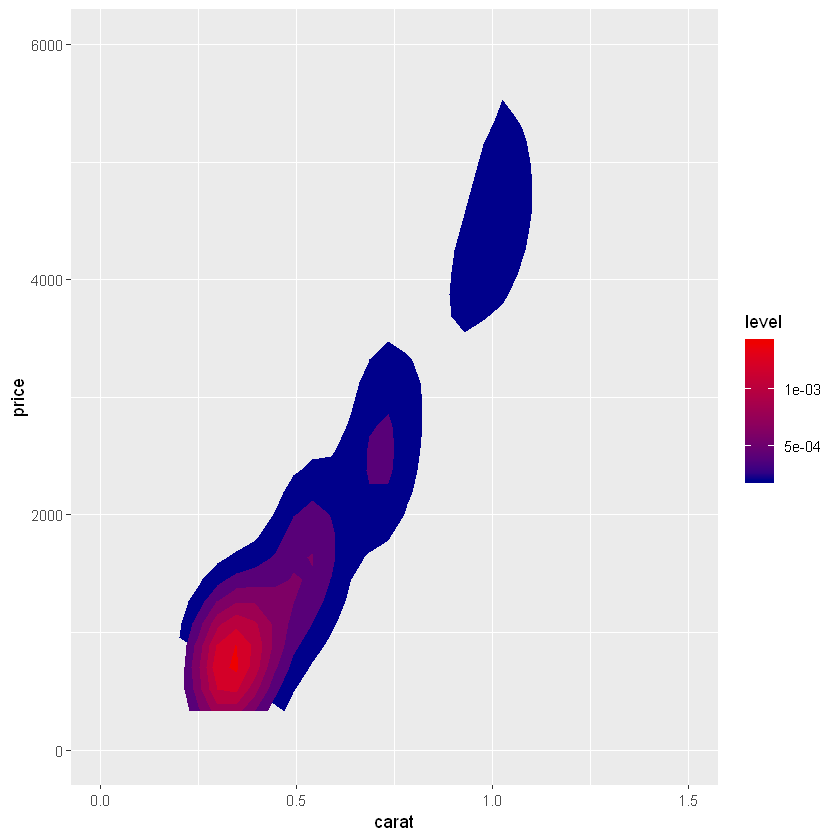

In [33]:
p + stat_density2d(aes(fill = ..level..), geom="polygon") +
coord_cartesian(xlim = c(0, 1.5),ylim=c(0,6000))+
scale_fill_continuous(high='red2',low='blue4')

**进阶**

风向风速玫瑰图

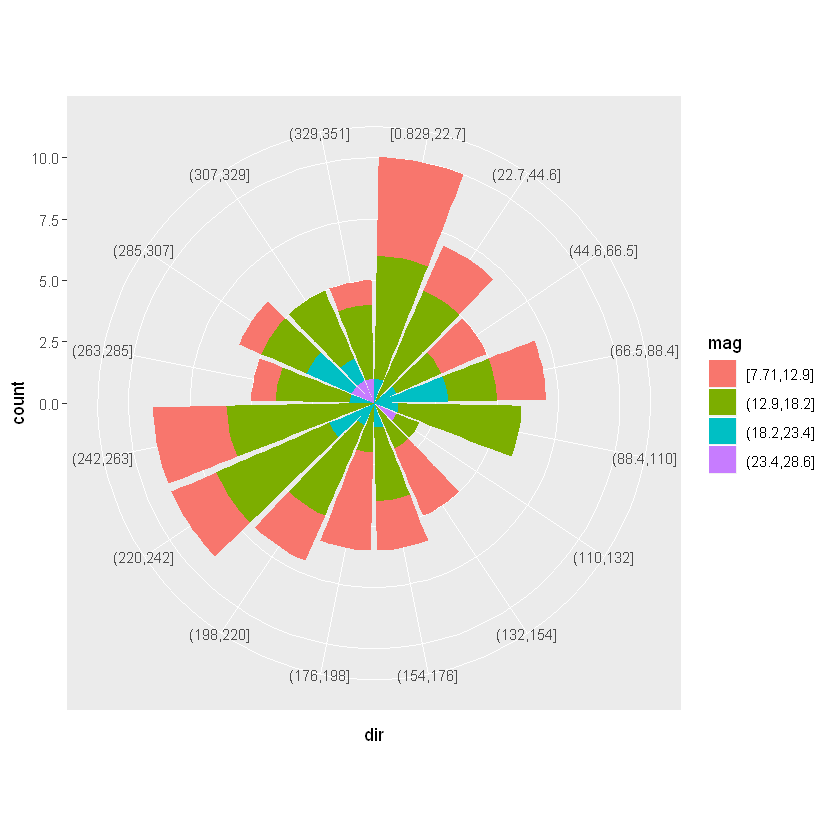

In [34]:
dir <- cut_interval(runif(100,0,360),n=16)
mag <- cut_interval(rgamma(100,15),4)
sample <- data.frame(dir=dir,mag=mag)
p <- ggplot(sample,aes(x=dir,y=..count..,fill=mag))
p + geom_bar()+ coord_polar()